# Part I - Ford GoBike System Feb 2019 Data Exploration
## by Michael Appiagyei

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np #array manipulations and mathematical computations
import pandas as pd # data analysis and manipulations
import matplotlib.pyplot as plt # plots and visualizations
import seaborn as sb #plots and visualizations
import datetime as dt # date time utility

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Loading dataset
fgbike = pd.read_csv('201902-fordgobike-tripdata.csv')
print(fgbike.shape)
print(fgbike.size)
print(fgbike.info())

(183412, 16)
2934592
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-nu

The dataset contains 183412 records with 16 features. Some features have incorrect datatypes. There are some missing entries as well. For the purpose of the analysis, I may have to develop new features. A little bit of data cleaning is required to tidy up this data set

### Data Cleaning

##### Define
  - Remove missing values in `start_station_id` and `member_birth_year`

##### Code

In [3]:
fgbike = fgbike.dropna(subset=['start_station_id', 'member_birth_year'])

##### Test

In [4]:
print(f'The total number of missing values in the dataset is {fgbike.isna().sum().sum()}\n')

print('\n FordGoBike Dataset Info')
fgbike.info()

The total number of missing values in the dataset is 0


 FordGoBike Dataset Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 

The dataset has no missing values after removing missing values from start_station_id and member_birth_year

##### Define : 
   Incorrect Data Types
  - `start_time` and `end_time` should be datetime objects
  - `member_birth_year` `start_station_id`, `end_station_id` should be int
   

##### Code:


In [5]:
# 1. Convert start_time and end_time to datatime objects 
start_end_time = ['start_time', 'end_time']
for item in start_end_time: 
    fgbike[item] = fgbike[item].astype('datetime64[ns]')
    
    
    

# 2. Convert member_birth_year, start_station_id, end_station_id to int
to_int_features = ['member_birth_year', 'start_station_id', 'end_station_id']
for feature in to_int_features:   
    fgbike[feature] = fgbike[feature].astype('int64')


##### Test

In [6]:
fgbike[['start_time', 'end_time', 'member_birth_year', 'start_station_id', 'end_station_id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   start_time         174952 non-null  datetime64[ns]
 1   end_time           174952 non-null  datetime64[ns]
 2   member_birth_year  174952 non-null  int64         
 3   start_station_id   174952 non-null  int64         
 4   end_station_id     174952 non-null  int64         
dtypes: datetime64[ns](2), int64(3)
memory usage: 8.0 MB


The start and end times are both datetime objects and the member_birth_year, start and end station ids are integer

##### Define
    Drop columns that are not of interest
- `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude`

##### Code

In [7]:
fgbike.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'],
         axis=1, inplace=True)

##### Test

In [8]:
fgbike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  int64         
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  int64         
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns

The columns have been removed successfully

In [9]:
fgbike.reset_index(drop=True, inplace=True)
fgbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  int64         
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  int64         
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns

# Feature Generation

- We might want to explore the effect of **Age**, **Time of day** and the particular **Day of the week** will have on our observations. 

In [10]:
#let's generate a new feature (Age) from year
def member_age(birth_year):
    return dt.date.today().year - birth_year

fgbike['age'] = fgbike.member_birth_year.map(member_age)


In [11]:
# Create a function to determine the time of day. I used the start_time to categorise the which part of the day the trip belongs
def get_tim_of_day(start_hour):
    time_of_day  = start_hour
    if time_of_day < 12 :
        return 'Morning'
    
    elif time_of_day >= 12 and time_of_day < 18:
        return 'Afternoon'

    else:
        return 'Evening'

#Create new feature Time_of_day
fgbike['time_of_day'] = fgbike.start_time.dt.hour.map(get_tim_of_day)

In [12]:
# Create new feature Day of the week 
fgbike['day'] = fgbike.start_time.dt.strftime('%A')

In [13]:
print(fgbike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  int64         
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  int64         
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
 12  age             

In [14]:
# convert time of day feature to its correct categorical datatype
timeday_order = ['Morning', 'Afternoon', 'Evening']
time_of_day_ord = pd.api.types.CategoricalDtype(ordered = True, categories=timeday_order)

fgbike.time_of_day = fgbike.time_of_day.astype(time_of_day_ord)

In [15]:
# convert day feature to its correct categorical datatype
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_cat = pd.api.types.CategoricalDtype(ordered = True, categories = week_days)
fgbike['day'] = fgbike['day'].astype(weekday_cat)

In [16]:
print(f' Shape of the dataset {fgbike.shape}')
print(f' Size of the dataset {fgbike.size}')
print (f' Total number of duplicated entries : {fgbike.duplicated().sum()}')
print (f' Total nummber of missing entries : {fgbike.isna().sum().sum()}')
print('\n Dataset Info')
fgbike.info()

 Shape of the dataset (174952, 15)
 Size of the dataset 2624280
 Total number of duplicated entries : 0
 Total nummber of missing entries : 0

 Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  int64         
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  int

In [17]:
fgbike.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803135,37.196865
std,1642.204905,111.648819,111.335635,1659.195937,10.118731,10.118731
min,61.000000,3.000000,3.000000,11.000000,1878.000000,21.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000,30.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000,35.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000,42.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000,144.000000


- The mean duration for trips is approximately 704 seconds with 75% of trips lasting for 789 seconds. 
- Most riders were born between 1980 and 1992 with the average age of riders being ~37 years

### What is the structure of your dataset?

There are 174952  records and sixteen (16) features in the dataset. The dataset consist of seven (7) numeric features, two(2) categorical features, five (5) string objects and two (2) datetime features

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in the dataset is :
**Duration of trips**
I am interested in determining the main factors that affect the duration of trips 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The time of the week and the age of the rider I believe will support the investigation. I also anticipate that gender will play a pivotal role in this investigation. The type of bike may also come into handy as well as the type of user whether he is a subscriber or a customer may also come to bare

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


Here, I analyze first the variable of interest (duration of trips in seconds). Let's look at how this variable is distributed in our dataset

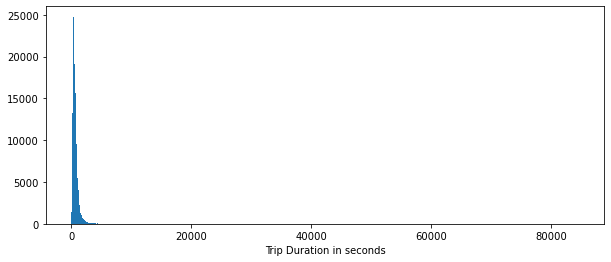

In [18]:
plt.figure(figsize=(10,4))

binsize = 100
bins = np.arange(0, fgbike['duration_sec'].max()+binsize, binsize)

plt.hist(data=fgbike, x='duration_sec', bins = bins);
plt.xlabel('Trip Duration in seconds')
plt.show()

There is a long tail of the distribution. However most of the observations are concentrated between 0 ans 20k. I will put in a log scale to further analyze the distribution

In [19]:
# Applying log transformation 
np.log10(fgbike.duration_sec).describe()

count    174952.000000
mean          2.707824
std           0.305190
min           1.785330
25%           2.509203
50%           2.707570
75%           2.897077
max           4.927103
Name: duration_sec, dtype: float64

Applying the log to the duration feature, we see that the minimum and maximum values are ~1.79 and ~4.93 respectively. This will be used to set the limits of our bins 

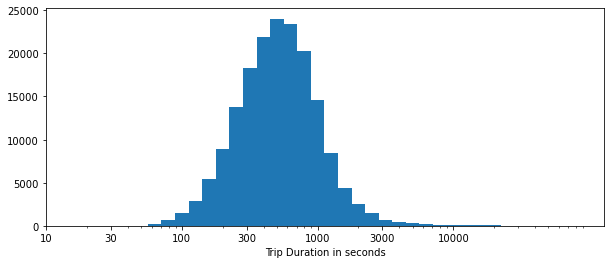

In [20]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(1.75, np.log10(fgbike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 4])
plt.hist(data = fgbike, x = 'duration_sec', bins = bins)
plt.xscale('log')
ticks =  [10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration in seconds')
plt.show()

> The duration of trips had a long tail. When plotted on a log scale, we see that a significant majority of trips last less than 3000 seconds. Infact over 75% of trips lasts less than 1000 seconds. The distribution is a normal distibution with the peak lying around the ~700 seconds. There is a slightly steep descent from the tip of the distribution as compared to gradual ascent on the left of the tip.




*Next I will analyze the other variables of interest*

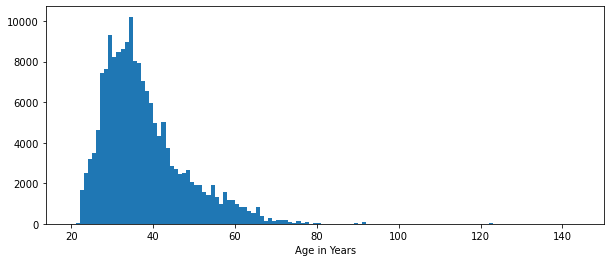

In [21]:
# Plotting age on standard scale with a binsize of 1
plt.figure(figsize=(10,4))

binsize = 1
bins = np.arange(20, fgbike['age'].max()+binsize, binsize)

plt.hist(data=fgbike, x='age', bins = bins);
plt.xlabel('Age in Years')
plt.show()

The **Age** feature has a long tail distribution with almost all observation lying between 20 and 60. 

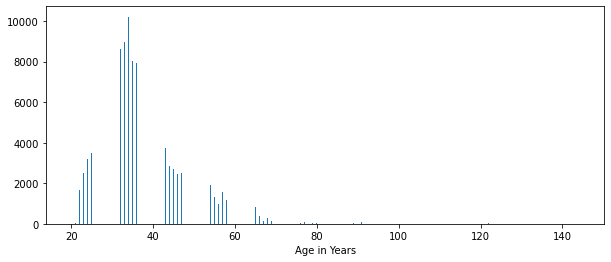

In [22]:
# plotting Age on a smaller bin size 
plt.figure(figsize=(10,4))

binsize = 0.1
bins = np.arange(20, fgbike['age'].max()+binsize, binsize)

plt.hist(data=fgbike, x='age', bins = bins);
plt.xlabel('Age in Years')
plt.show()

We see a clear segmentation of the Age of the riders. With most riders falling between the ages of ~35 and ~38. There are some outliers in the age. A maximum age of ~140 years seem highly unlikely. We will use a cutoff age of 85

In [23]:

fgbike = fgbike[fgbike['age'] <= 85]

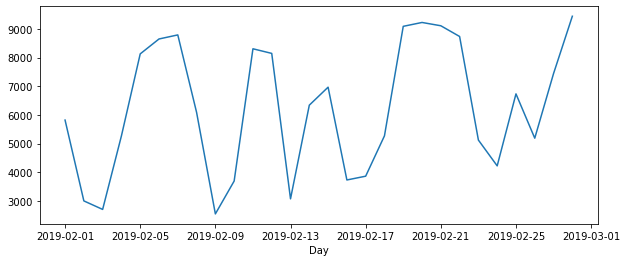

In [24]:
# Let's see the time series distribution of trips
plt.figure(figsize=(10,4))
fgbike.start_time.dt.date.value_counts().sort_index().plot()
plt.xlabel('Day')
plt.xticks(rotation = 0);

> Here we see the the distribution of the trips for the whole period in the dataset. There are peak points and low points at certain days and times. This may suggest the underlying behaviour of bike rides at certain days of the week. We will analyze this further 

<AxesSubplot:xlabel='member_gender', ylabel='count'>

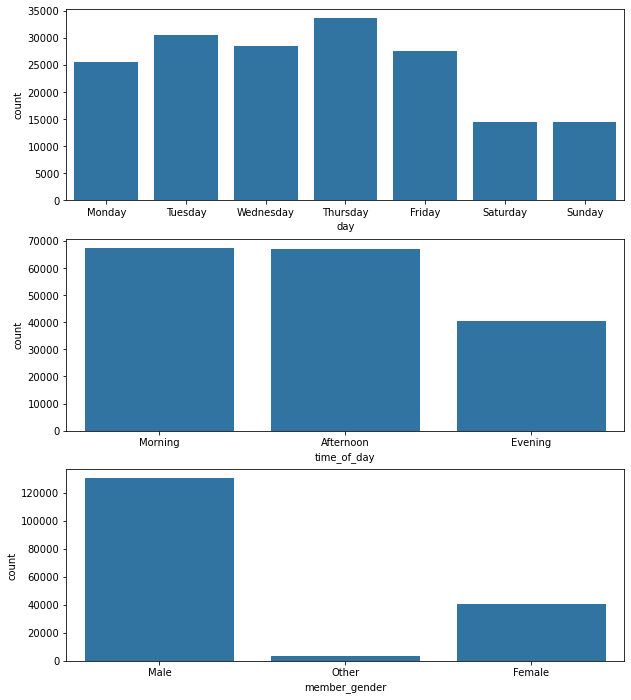

In [25]:
# In addition to the plot for the day types, we will add all the other categorical variables of interest
fig, ax = plt.subplots( nrows=3, figsize = [10,12])

base_color = sb.color_palette()[0]
sb.countplot(data = fgbike, x = 'day', color = base_color, ax = ax[0])
sb.countplot(data = fgbike, x = 'time_of_day', color = base_color,ax = ax[1])
sb.countplot(data = fgbike, x = 'member_gender', color = base_color, ax = ax[2])



Thursdays and Tuesdays have higher trip counts with Sunday and Saturday recording the least number of trips. 
With regards to **Gender**, there are three main categories with males dominating the number of trips. Trip count for males outnumber that of Females 3 to 1. 
With Regards to **Time_of_day**, the trips are evenly spread between mornings and afternoons with evening recording the list trips amongst the three. 



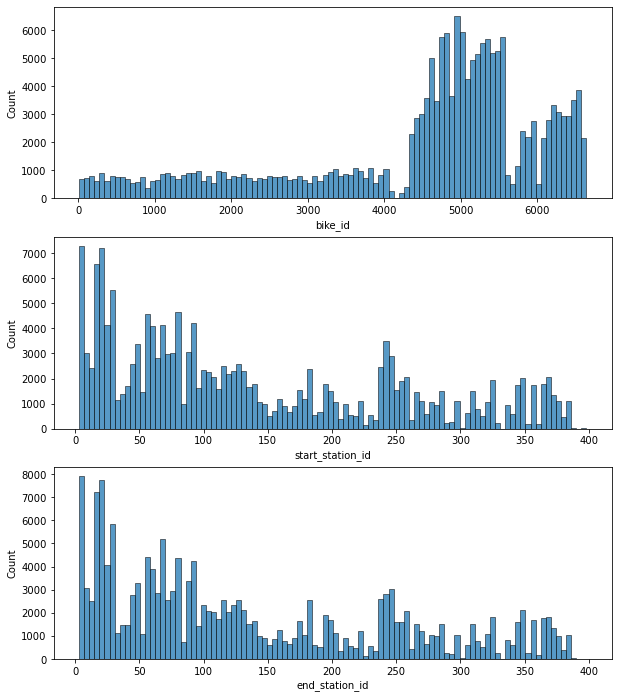

In [26]:
# Analyse other variables to see if they will be of interest

fig, ax = plt.subplots( nrows=3, figsize = [10,12])

sb.histplot(data = fgbike, x = 'bike_id', bins=100, ax = ax[0])
sb.histplot(data = fgbike, x = 'start_station_id', bins=100, ax = ax[1])
sb.histplot(data = fgbike, x = 'end_station_id', bins=100, ax = ax[2]);



most trips are done with bikes with id's ~4100 and ~5500. This could be an indcation of whether bike type (bike_id) affect the number and duration of trips. 
The start and end station ids distribution are the rougly the same

<AxesSubplot:xlabel='user_type', ylabel='count'>

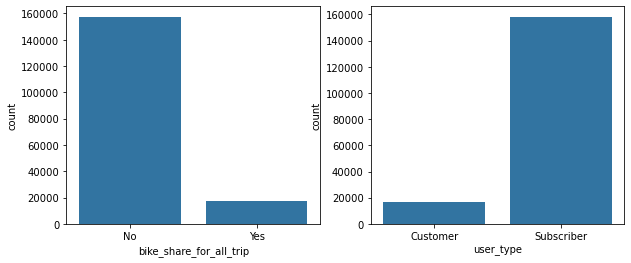

In [27]:
fig, ax = plt.subplots( ncols=2, figsize = [10,4])

sb.countplot(data = fgbike, x = 'bike_share_for_all_trip', color = base_color, ax = ax[0])
sb.countplot(data = fgbike, x = 'user_type', color = base_color,ax = ax[1])



For most trips, the bikes are not shared. Most user types are subscribers as opposed to customers.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the duration of trips in seconds has long tail. To further analyse the data, I applied a log transformation to the feature. Under the log transformation, the data followed a normal distribution with most values centered around a mean of roughy 750 secs. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The age had a long tail. The outlier ages were removed from the dataset. The distribution of Day of the week, Time of Day and Gender were nothing unusual. The bike_id gave an indication of the most preferred bikes. They may have an effect of trip count and trip duration 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [28]:
fgbike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174763 entries, 0 to 174951
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174763 non-null  int64         
 1   start_time               174763 non-null  datetime64[ns]
 2   end_time                 174763 non-null  datetime64[ns]
 3   start_station_id         174763 non-null  int64         
 4   start_station_name       174763 non-null  object        
 5   end_station_id           174763 non-null  int64         
 6   end_station_name         174763 non-null  object        
 7   bike_id                  174763 non-null  int64         
 8   user_type                174763 non-null  object        
 9   member_birth_year        174763 non-null  int64         
 10  member_gender            174763 non-null  object        
 11  bike_share_for_all_trip  174763 non-null  object        
 12  age             

In [29]:
# split data into categorical and numerical 
num_vars = ['duration_sec', 'age', 'start_station_id', 'end_station_id', 'bike_id','member_birth_year']
date_vars = ['start_time', 'end_time']
cat_vars = ['start_station_name', 'end_station_name', 'user_type', 
            'bike_share_for_all_trip', 'time_of_day','member_gender','day']


I will analyze the corelation between the numerical variables and the categorical variables

<AxesSubplot:>

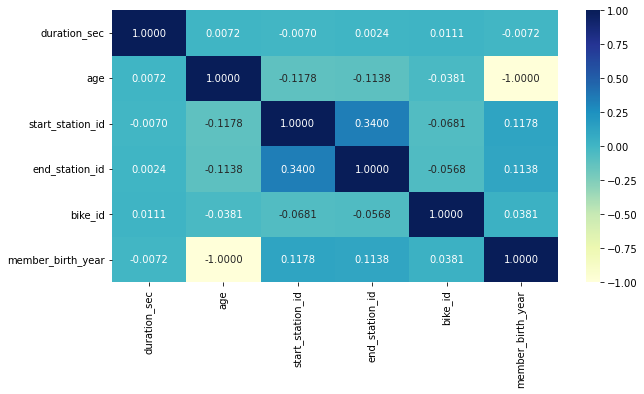

In [30]:
# Pairwise correlations amongst numerical variables
plt.figure(figsize=(10,5))
cor_matrix = fgbike[num_vars].corr()
sb.heatmap(cor_matrix, annot=True, cmap='YlGnBu', fmt= '.4f', center=0)

As expected, trip duration in sec have positive correlation with age. However, something intersting comes up. The corelation between trip duration and end_station_id as well as bike_id is also positive. Infact that of bike_id is higher than age. 
Age and member_birth_year have a perfect negative corelation. This is true as the bigger the year you are born in, the lower your age and vice versa. Start and end station ids also have a higher correlation with birth_year.

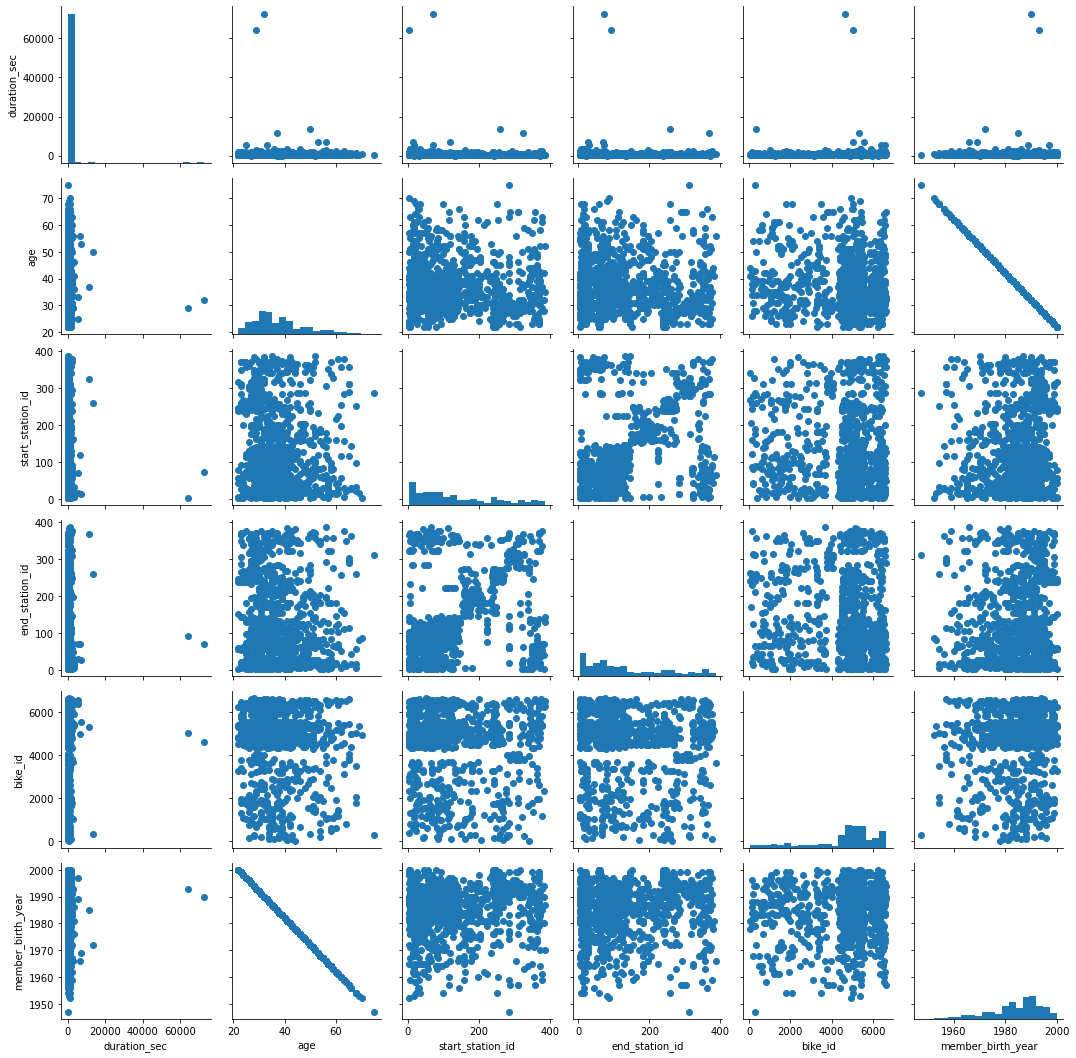

In [31]:
# Pairwise corelation between categorical variables
samples = np.random.choice(fgbike.shape[0], 1000, replace = False)
fgbike_sample = fgbike.iloc[samples,:]

g = sb.PairGrid(data = fgbike_sample, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

>As expected, trip duration in sec have positive correlation with age. However, something intersting comes up. The corelation between trip duration and end_station_id as well as bike_id is also positive. Infact that of bike_id is higher than age. Age and member_birth_year have a perfect negative corelation. This is true as the bigger the year you are born in, the lower your age and vice versa. Start and end station ids also have a higher correlation with birth_year. There are fewer obervations for age against start_station and end station ids as age increases.

We will analyze how our variable of interest corelates with other categorical variables. We will isolate the start_station and end_station names from this analysis. We have already done that using the start and end station ids


<Figure size 720x720 with 0 Axes>

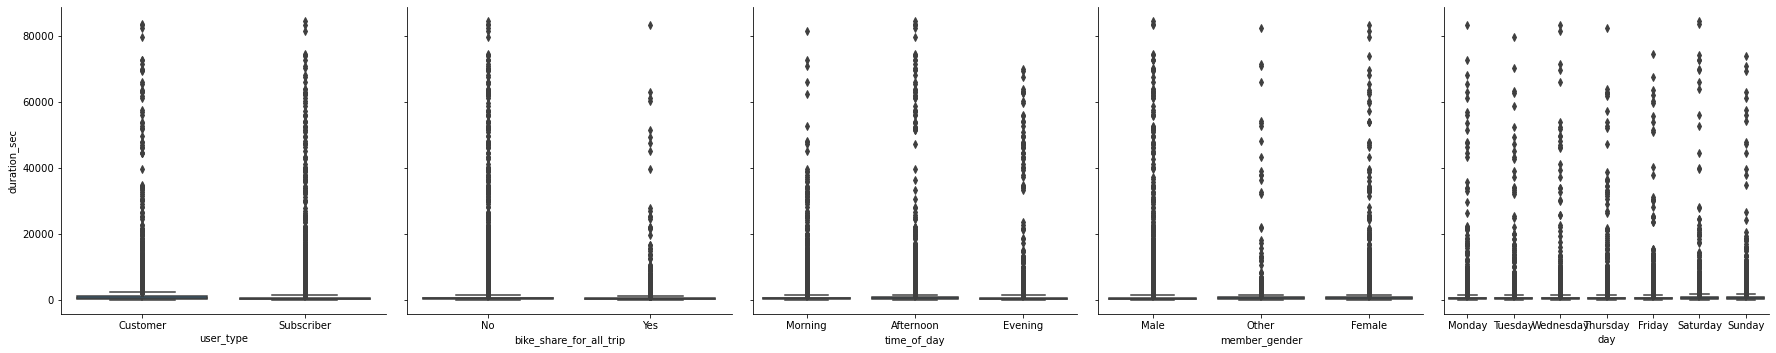

In [32]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """

    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = fgbike, y_vars = ['duration_sec'], x_vars = cat_vars[2:],
                height = 5, aspect = 1)
g.map(boxgrid)
plt.show();

it is difficult to see the boxplot distributions properly. This I suspect is because of the large scale of duration_sec ranging from 0 to over 80k. I will convert the seconds to minutes and analyse again 

In [33]:
fgbike['duration_min'] = fgbike['duration_sec']/60

<Figure size 720x720 with 0 Axes>

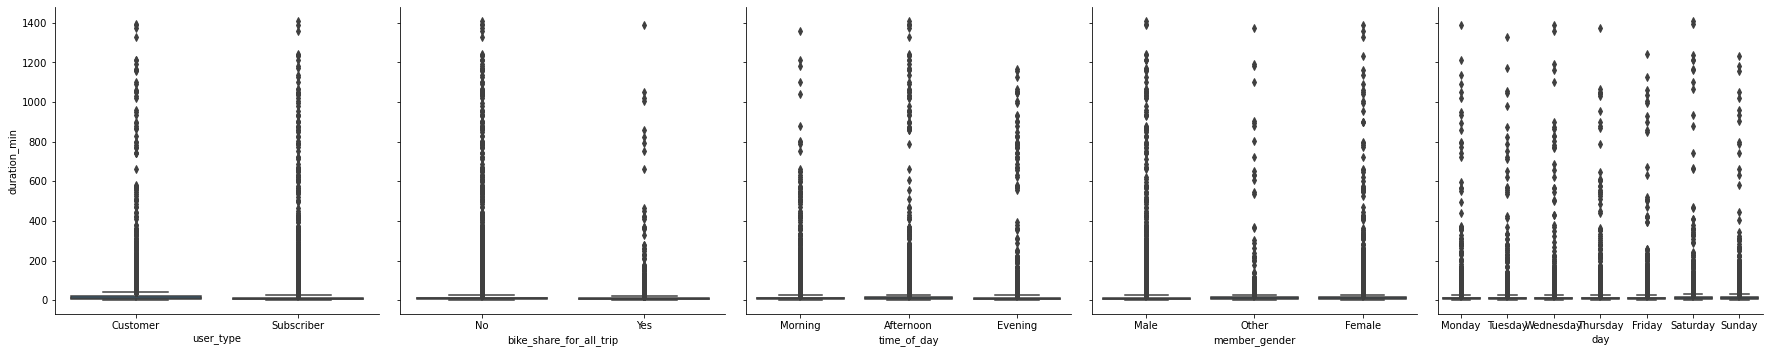

In [34]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = fgbike, y_vars = ['duration_min'], x_vars = cat_vars[2:],
                height = 5, aspect = 1)
g.map(boxgrid)
plt.show();

It looks like the issue has still not been resolved. I will apply a log transformation to the feature and analyse again 

In [35]:
fgbike['duration_min'] = np.log10(fgbike['duration_min'])

<Figure size 1080x720 with 0 Axes>

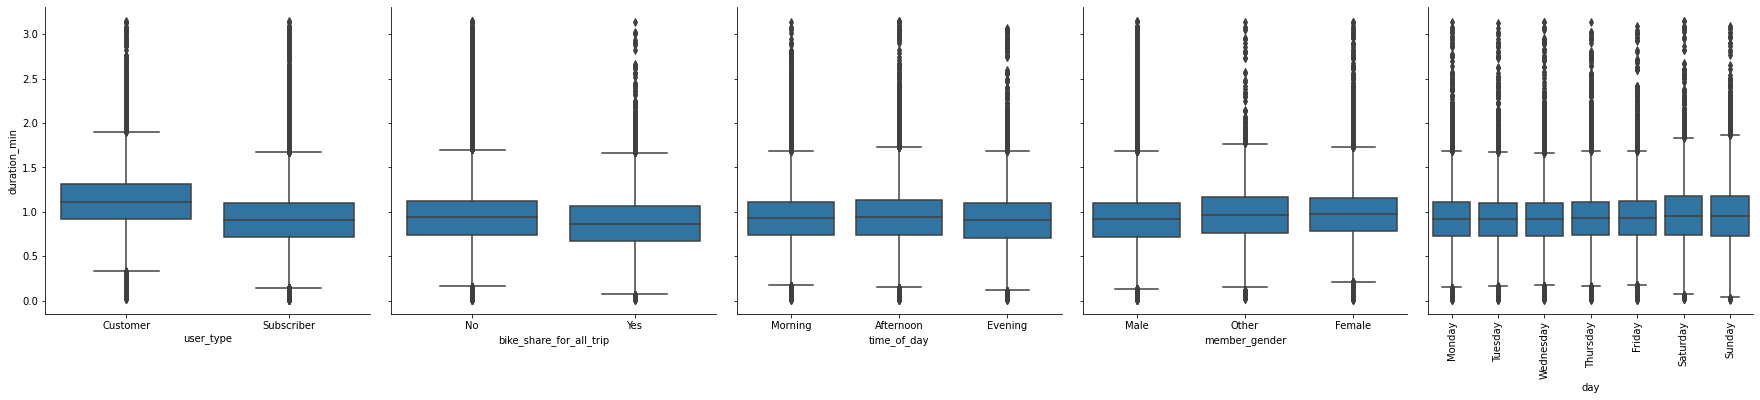

In [36]:
plt.figure(figsize = [15, 10])
g = sb.PairGrid(data = fgbike, y_vars = ['duration_min'], x_vars = cat_vars[2:],
                height = 5, aspect = 1)
g.map(boxgrid)
plt.xticks(rotation='90')
plt.show()

Although there are less customers than subscribers, the mean duration covered by customers is more than that of subscribers. More trip durations are covered in the afternoon than the other time of day. Also, females and other gender comparateively record more long lasting trips than males. Something interesting happen with the day of the week. Recall that there are fewer trips on Sundays and Saturdays, however the mean duration of trips on these days are higher than the other days.

<Figure size 1080x720 with 0 Axes>

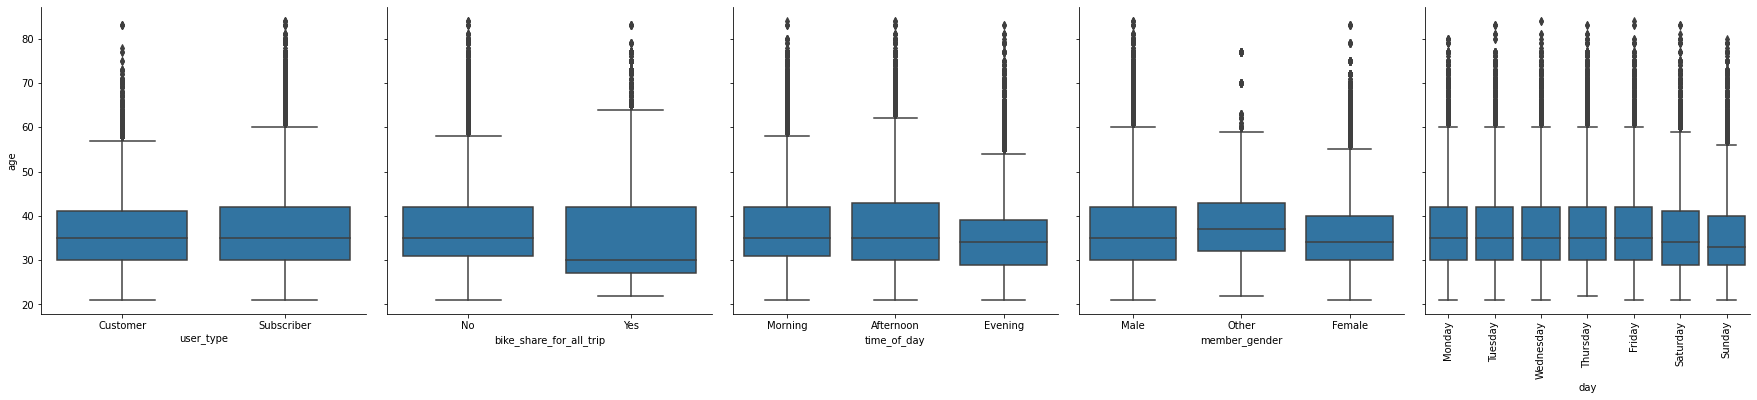

In [37]:
plt.figure(figsize = [15, 10])
g = sb.PairGrid(data = fgbike, y_vars = ['age'], x_vars = cat_vars[2:],
                height = 5, aspect = 1)
g.map(boxgrid)
plt.xticks(rotation='90')
plt.show()

The mean age so far as user type is concerned is fairly the same regardless of the user type. We see that there are younger females than the other type of genders. Also younger people tend to ride on Saturdays and Sundays. This perhaps explains why we have higher mean trip duration in females and on weekends. 


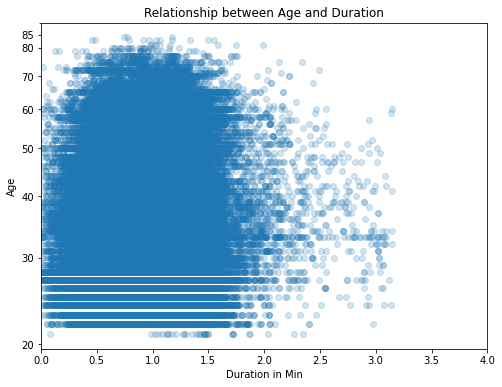

In [38]:
# lets see a plot between log_duration_min and bike_id
plt.figure(figsize = [8, 6])
plt.scatter(data = fgbike, x = 'duration_min', y = 'age', alpha = 2/10)
plt.xlim([0, 4])
plt.xlabel('Duration in Min')
plt.yscale('log')
ticks =  [20,30, 40, 50,60, 70, 80, 85]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.ylabel('Age')
plt.title('Relationship between Age and Duration')
plt.show()

The plot doesn't reveal much apart from the fact that most observation with higher trip duration remains the same and decline at about age 60

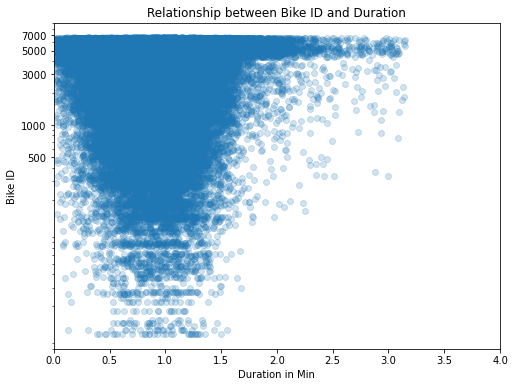

In [39]:
# lets see a plot between log_duration_min and bike_id
plt.figure(figsize = [8, 6])
plt.scatter(data = fgbike, x = 'duration_min', y = 'bike_id', alpha = 2/10)
plt.xlim([0, 4])
plt.xlabel('Duration in Min')
plt.yscale('log')
ticks =  [500,1000,3000, 5000,7000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.ylabel('Bike ID')
plt.title('Relationship between Bike ID and Duration')
plt.show()

We can see that as the bike_id rises, more and more observation are recorded. The trip duration also increases with rising bike_id. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscriber user types although are much more than customers, the average trip distance covered by customers are higher. This indicates that subscribers mostly cover short distances. The average distance covered on weekends tend to be higher than that of the other working days, younger people mostly ride on weekends and this gives an indication of why it is so. The average trip distance for females is higher than the other gender types. We see that the mean age of females is comparatively lower than the other gender types. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between bike_id and duration of trips was the most interesting. Also the fact that customers who are heavily outnumbered by subscribers tend to put in more distance on the average than susbcribers

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

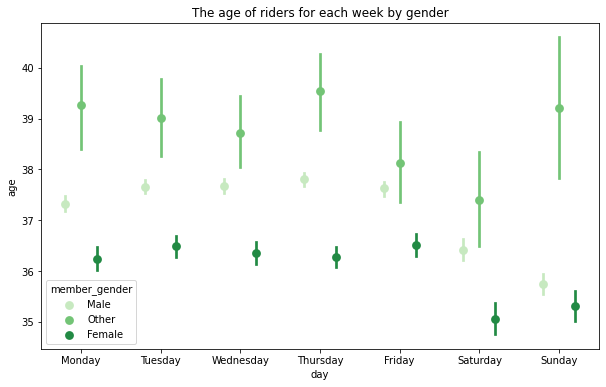

In [40]:
fig = plt.figure(figsize = [10,6])
ax = sb.pointplot(data = fgbike, x = 'day', y = 'age', hue = 'member_gender',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('The age of riders for each week by gender')
plt.show();

The ages of the females are comparatively lower with little error bars. There are more younger females than males and other genders. We clearly see the age distribution amongst riders for each particular day. There is a clear hierachy with other gender having the highest ages

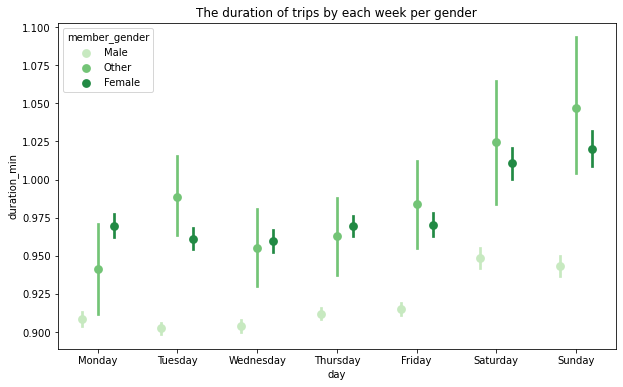

In [41]:
fig = plt.figure(figsize = [10,6])
ax = sb.pointplot(data = fgbike, x = 'day', y = 'duration_min', hue = 'member_gender',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('The duration of trips by each week per gender')
plt.show();

Here we see the hierachy of duration of trips for each day by gender. We see that females are doing more distances than their counterparts

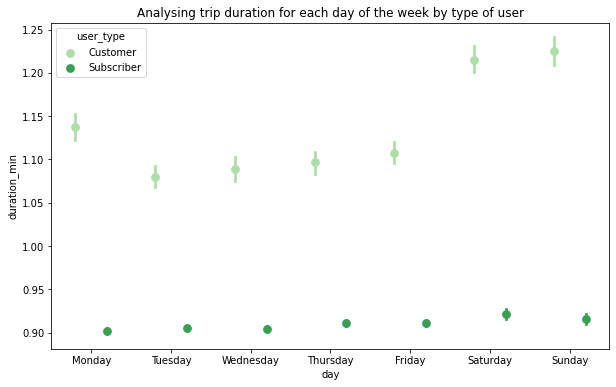

In [42]:
fig = plt.figure(figsize = [10,6])
ax = sb.pointplot(data = fgbike, x = 'day', y = 'duration_min', hue = 'user_type',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Analysing trip duration for each day of the week by type of user')
plt.show()

Subscribers cover relatively short distances. This explains why the mean distance for Customers is higher than that of customers although there are more subscriber bike trips

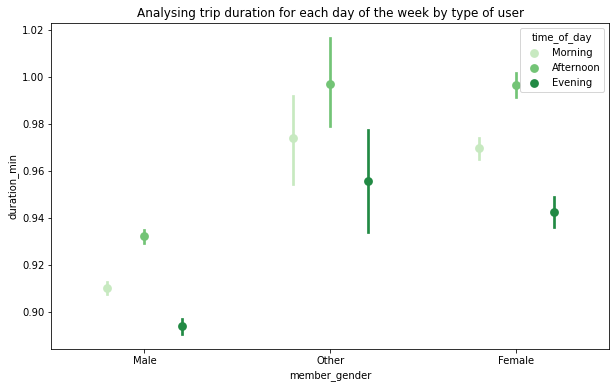

In [43]:
fig = plt.figure(figsize = [10,6])
ax = sb.pointplot(data = fgbike, x = 'member_gender', y = 'duration_min', hue = 'time_of_day',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Analysing trip duration for each day of the week by type of user')
plt.show()

More trips are covered in the afternoons for all the three genders than any other time

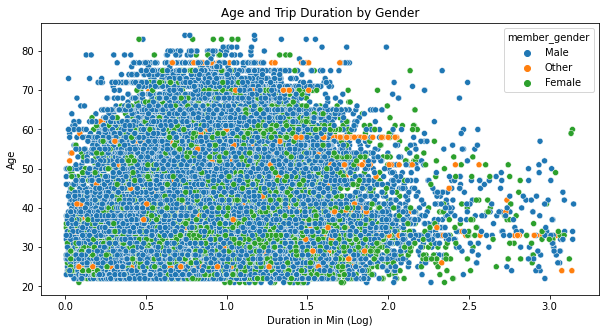

In [44]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=fgbike, y='age', x='duration_min', hue='member_gender')
plt.ylabel('Age')
plt.xlabel('Duration in Min (Log)')
plt.title('Age and Trip Duration by Gender')
plt.show();

The number of males in the dataset greatly outnumbers that of the females. However, at longer trip distances, particularly when riders are between the ages of ~25 and ~40 years, we see that the females dominate that region

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I looked at the impact of age on the genders. I have established that younger riders and female riders have a high average distance covered than older rider and rider of other genders respectively. Here we see that infact most females tend to be younger than their male and other gender counterparts. We also see the ride behaviour of the various user types and why Customers tend to have a high mean trip duration than subscribers

### Were there any interesting or surprising interactions between features?

> Nothing surprising apart from reaffirming the fact that age plays a pivotal role in the duration of trips. Also the time of day and gender also gives a strong indication of how the long the trips is likely to last

## Conclusions
>The investigation revealed interesting stuff about what is likely to affect trip distance. I started of by generating some features which I believe will be needed to predict factors that are most likely to affect trip duration. I performed univariate analysis on the variable of interest (trip duration in seconds) by applying some transformation to the data to further analysis the distribution of the variable in the dataset. I also analysed other variables that were likely to impact trip distance. The bivariate and multivariate analysis revealed other variables that are likely to affect trip duration but were not of interest at the beginning of the analysis. In all it became clear that age and gender are the main variables that impact trip duration. Longer trips are done on weekends which may suggest trips for leisure and other fun activities when people have more time on their hands. The data was for a period of one month and would have been interesting to see and analyse data for a longer period of time to see if some interesting trends and findings will emerge


In [45]:
# save the data for use in future
fgbike.to_csv('fordgobike_clean.csv', index=False)